In [8]:
import numpy as np

def get_mnist_data():
    import os
    from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data


    x_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    x_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    
    data = {'train': {'X': x_train[0:,0,0:28,0:28].reshape((x_train.shape[0],-1)),
                      'y': y_train},
            'test': {'X': x_test[0:,0,0:28,0:28].reshape((x_test.shape[0],-1)),
                     'y': y_test}}
    
    return data

In [5]:
data = get_mnist_data()
"""
Example of accessing a single train vector
"""
example = data['train']['X'][3]
print(type(example))
print(example.shape)
print(example)

<class 'numpy.ndarray'>
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

In [6]:
"""
Example of displaying a single image
"""

imageId = 15
viewImageByIndex(data, imageId)

Label: 5


<Figure size 640x480 with 1 Axes>

In [10]:
#exercitiul1
digit_0 = np.array([0, 2, 3,8] )
digit_1 = np.array([1, 7, 4, 9])

In [11]:
testare = data['test']['y'][0:20]
antrenare = data['train']['y'][0:20]
print(testare)
print(antrenare)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [49]:
m=len(data['train']['y'][:])
n=len(data['test']['y'][:])

def search_index(x):
    list_1=np.array([])
    for i in range(m):
        if(data['train']['y'][i]==x):
            list_1=np.append(list_1,[i])
    return list_1

def search_indici(x):
    #m=len(data['train']['y'][:])
    #n=len(data['test']['y'][:])
    list_train=np.array([])
    list_test=np.array([])
    for i in range(m):
        if(data['train']['y'][i] == x):
            list_train=np.append(list_train,[i])
    for i in range(n):
        if(data['test']['y'][i] == x):
            list_test=np.append(list_test,[i])        
    return (list_train,list_test)


In [46]:
import copy
data2 = copy.deepcopy(data)
print(data2)
data3=data['train']['X'][0:10]
print(len(data3), data3)
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
len(arr)
np.delete(arr, 1, 0)

{'train': {'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'y': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)}, 'test': {'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'y': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}}
10 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [50]:
def train_for_number(x,y):
    a=[]
    b=[]
    indici_x=search_index(x).astype(int)
    indici_y=search_index(y).astype(int)
    n=len(indici_x)
    m=len(indici_y)
    for i in range(n):
        a.append(data['train']['X'][indici_x[i]])
    for j in range(m):
        b.append(data['train']['X'][indici_y[j]])
    train_x = np.asarray(a)
    train_y = np.asarray(b)
    return (train_x,train_y)

pair_0_1=train_for_number(0,1)
pair_2_7=train_for_number(2,7)
pair_3_4=train_for_number(3,4)
pair_8_9=train_for_number(8,9)

In [51]:
print(len(pair_0_1[0]),len(pair_2_7[0]),len(pair_3_4[0]),len(pair_8_9[0]))
print(len(pair_0_1[1]),len(pair_2_7[1]),len(pair_3_4[1]),len(pair_8_9[1]))

5923 5958 6131 5851
6742 6265 5842 5949


In [52]:
def data_for_pair(x,y,ch):
    if (ch == 'train'):
        l=0
    if (ch == 'test'):
        l=1
    a=[]
    b=[]
    indici_x=search_indici(x)[l].astype(int)
    indici_y=search_indici(y)[l].astype(int)
    n=len(indici_x)
    m=len(indici_y)
    for i in range(n):
        a.append(data[ch]['X'][indici_x[i]])
    for j in range(m):
        b.append(data[ch]['X'][indici_y[j]])
    data_x = np.asarray(a)
    data_y = np.asarray(b)
    return (data_x,data_y)

In [53]:
train_pair_0_1=data_for_pair(0,1,'train')
test_pair_0_1=data_for_pair(0,1,'test')

print(len(train_pair_0_1[0]),len(train_pair_0_1[1]))
print(len(test_pair_0_1[0]),len(test_pair_0_1[1]))
print(train_pair_0_1[0])

5923 6742
980 1135
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
train_pair_2_7=data_for_pair(2,7,'train')
test_pair_2_7=data_for_pair(2,7,'test')
train_pair_3_4=data_for_pair(3,4,'train')
test_pair_3_4=data_for_pair(3,4,'test')
train_pair_8_9=data_for_pair(8,9,'train')
test_pair_8_9=data_for_pair(8,9,'test')

In [ ]:
# exercitiul 2

In [55]:

print(len(train_pair_0_1[0]),len(train_pair_0_1[1]))
print(len(train_pair_2_7[0]),len(train_pair_2_7[1]))
print(len(train_pair_3_4[0]),len(train_pair_3_4[1]))
print(len(train_pair_8_9[0]),len(train_pair_8_9[1]))

5923 6742
5958 6265
6131 5842
5851 5949


In [56]:
def y_label_train(lungime,cifra):
    vect = np.empty(lungime)
    vect.fill(cifra)
    return vect

def y_array_label(X,Y,x,y):
    y_t=[]
    y_t.append(y_label_train(len(X),x))
    y_t.append(y_label_train(len(Y),y))
    array_vect=np.concatenate((y_t[0],y_t[1]), axis=None)
    return array_vect
    


X_train01=np.concatenate((train_pair_0_1[0], train_pair_0_1[1]), axis=0)
y_train01=y_array_label(train_pair_0_1[0],train_pair_0_1[1],0,1)

print(X_train01,y_train01,len(X_train01),len(y_train01))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [0. 0. 0. ... 1. 1. 1.] 12665 12665


In [57]:

X_train27=np.concatenate((train_pair_2_7[0], train_pair_2_7[1]), axis=0)
y_train27=y_array_label(train_pair_2_7[0],train_pair_2_7[1],2,7)

print(X_train27,y_train27,len(X_train27),len(y_train27))

X_train34=np.concatenate((train_pair_3_4[0], train_pair_3_4[1]), axis=0)
y_train34=y_array_label(train_pair_3_4[0],train_pair_3_4[1],3,4)
print(X_train34,y_train34,len(X_train34),len(y_train34))

X_train89=np.concatenate((train_pair_8_9[0], train_pair_8_9[1]), axis=0)
y_train89=y_array_label(train_pair_8_9[0],train_pair_8_9[1],8,9)
print(X_train89,y_train89,len(X_train89),len(y_train89))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [2. 2. 2. ... 7. 7. 7.] 12223 12223
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [3. 3. 3. ... 4. 4. 4.] 11973 11973
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8. 8. 8. ... 9. 9. 9.] 11800 11800


In [58]:

X_test01=np.concatenate((test_pair_0_1[0], test_pair_0_1[1]), axis=0)
y_test01=y_array_label(test_pair_0_1[0],test_pair_0_1[1],0,1)

X_test27=np.concatenate((test_pair_2_7[0], test_pair_2_7[1]), axis=0)
y_test27=y_array_label(test_pair_2_7[0],test_pair_2_7[1],2,7)

print(X_test27,y_test27,len(X_test27),len(y_test27))

X_test34=np.concatenate((test_pair_3_4[0], test_pair_3_4[1]), axis=0)
y_test34=y_array_label(test_pair_3_4[0],test_pair_3_4[1],3,4)
print(X_test34,y_test34,len(X_test34),len(y_test34))

X_test89=np.concatenate((test_pair_8_9[0], test_pair_8_9[1]), axis=0)
y_test89=y_array_label(test_pair_8_9[0],test_pair_8_9[1],8,9)
print(X_test89,y_test89,len(X_test89),len(y_test89))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [2. 2. 2. ... 7. 7. 7.] 2060 2060
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [3. 3. 3. ... 4. 4. 4.] 1992 1992
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8. 8. 8. ... 9. 9. 9.] 1983 1983


In [59]:

from sklearn import linear_model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

class estimatorWrapper(linear_model.LogisticRegression):
    def __init__(self, t, lr):
        self.lr = lr
        self.t = t
        
    def fit(self, X, y):
        self.lr.fit(X,y)
    
    def predict(self, xVal):
        predProb = self.lr.predict_proba(xVal)
        ret = []
        
        def choice(p):
            retVal = 0
            
            if p[1] > self.t:
                retVal = 1
            #print(p[1],self.t,retVal)
            return retVal
            
        for p in predProb:
            ret.append(choice(p))
        return ret

In [60]:
from sklearn.model_selection import cross_val_score
#linear_model.LogisticRegression(solver='lbfgs')
#logistic_regression_model=LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')

X, y = X_test01 , y_test01

# t in [0, 1] with 0.05 increments
t_range = np.arange(0.0, 1.0, 0.05)
t_scores = []

for t in t_range:
    clf = linear_model.LogisticRegression(C=1e5,solver='liblinear')
    wrapp = estimatorWrapper(t, clf)
    scores = cross_val_score(wrapp, X, y, cv=5, scoring='accuracy')
    print(scores)
    t_scores.append(scores.mean())
    
print(t_scores)   
plt.close()

plt.plot(t_range, t_scores)
plt.xlabel('Value of t for LR')
plt.ylabel('Cross-validated accuracy')

plt.show()

[0.53664303 0.53664303 0.53664303 0.53664303 0.53664303]
[0.99763593 1.         0.99763593 0.99763593 0.99527187]
[1.         1.         0.99763593 0.99763593 0.99763593]
[1.         1.         0.99763593 0.99763593 0.99763593]
[1.         1.         0.99763593 0.99763593 0.99763593]
[1.         1.         0.99763593 1.         0.99763593]
[1.         1.         0.99763593 1.         0.99763593]
[1.         1.         0.99763593 1.         0.99763593]
[1.         1.         0.99763593 1.         0.99763593]
[1.         1.         1.         1.         0.99763593]
[1.         1.         1.         1.         0.99763593]
[1.         1.         1.         1.         0.99763593]
[1.         1.         0.99763593 1.         0.99763593]
[1.         1.         0.99763593 1.         0.99763593]
[1.         0.99763593 0.99763593 1.         0.99763593]
[1.         0.99763593 0.99763593 1.         0.99763593]
[1.         0.99763593 0.99763593 1.         0.99763593]
[1.         0.99527187 0.997635

[0.5323332057735092, 0.9983419180774558, 0.9984998336172675, 0.9984209070190039, 0.9984998647766036, 0.9984208758350555, 0.9984208758350555, 0.9984209070190039, 0.9981839401943592, 0.9981839401943592, 0.9982628979519589, 0.9982628979519589, 0.9983418245502225, 0.9984208134917708, 0.9984997400900344, 0.9984208134917708, 0.998499802433319, 0.9984998647766036, 0.9982629915038045, 0.9978682650098658]


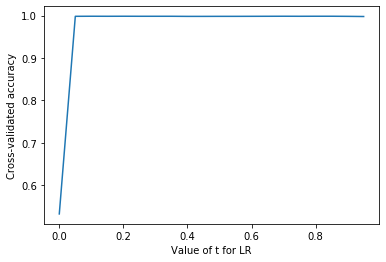

In [61]:
X, y = X_train01 , y_train01

# t in [0, 1] with 0.05 increments
t_range = np.arange(0.0, 1.0, 0.05)
t_scores = []

for t in t_range:
    clf = linear_model.LogisticRegression(C=1e5,solver='liblinear')
    wrapp = estimatorWrapper(t, clf)
    scores = cross_val_score(wrapp, X, y, cv=5, scoring='accuracy')
    t_scores.append(scores.mean())
    
print(t_scores)   
plt.close()

plt.plot(t_range, t_scores)
plt.xlabel('Value of t for LR')
plt.ylabel('Cross-validated accuracy')

plt.show()

In [63]:

from sklearn.model_selection import cross_val_score

logisticRegr = linear_model.LogisticRegression(solver = 'lbfgs',max_iter=1100)

model=logisticRegr.fit(X_train34,y_train34)

score = logisticRegr.score(X_train34, y_train34)
print(score)

#sau

scores = cross_val_score(model, X_train34, y_train34, cv=5)
print(scores,scores.mean())

0.9984966173891255
[0.99373957 0.99331942 0.99331662 0.99540518 0.99373434] 0.9939030243485935


In [64]:

from sklearn.model_selection import cross_val_score

X, y = X_train34 , y_train34


# t in [0, 1] with 0.05 increments
t_range = np.arange(0.0, 1.0, 0.05)
t_scores = []

for t in t_range:
    clf = linear_model.LogisticRegression(C=1e5,solver='lbfgs',max_iter=1100)
    wrapp = estimatorWrapper(t, clf)
    scores = cross_val_score(wrapp, X, y, cv=5, scoring='accuracy')
    t_scores.append(scores.mean())
    
print(t_scores)   
plt.close()

plt.plot(t_range, t_scores)
plt.xlabel('Value of t for LR')
plt.ylabel('Cross-validated accuracy')

plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [65]:
t_best=0.25

X_train_total1=np.concatenate((X_train01, X_train27), axis=0)
X_train_total2=np.concatenate((X_train34, X_train89), axis=0)
X_train_total=np.concatenate((X_train_total1, X_train_total2), axis=0)

y_train_total1=np.concatenate((y_train01, y_train27), axis=0)
y_train_total2=np.concatenate((y_train34, y_train89), axis=0)
y_train_total=np.concatenate((y_train_total1, y_train_total2), axis=0)
print(len(X_train_total),len(y_train_total))

48661 48661


In [66]:
from sklearn.model_selection import cross_val_score

X, y = X_train01 , y_train01

t_best=0.20
t_scores = []

clf = linear_model.LogisticRegression(C=1e5,solver='liblinear', max_iter=1100)
wrapp = estimatorWrapper(t_best, clf)
scores = cross_val_score(wrapp, X, y, cv=5, scoring='accuracy')
t_scores.append(scores.mean())
    
print(t_scores)

[0.9984998647766036]


In [67]:
#exercitiul 6
def viewSquareImage(imageOnSingleLine, label="",predict=""):
    """
    View a single image.

    Parameters
    ----------
    image : numpy array
        Make sure this is of the shape you want.
    label : str
    """
    from matplotlib.pyplot import show, imshow, cm
    import matplotlib.pyplot as plt
    
    plt.close()
    
    print("Label: %s" % label,"Predict: %s" % predict)
    size = int(len(imageOnSingleLine)**(0.5))
    imageSquare = imageOnSingleLine.reshape((size, size))
    imshow(imageSquare, cmap=cm.gray)
    show()   
    
def viewImageByIndex(dataDict, idx, prediction, trainOrTest="test"):
    viewSquareImage(dataDict[trainOrTest]['X'][idx], dataDict[trainOrTest]['y'][idx],prediction)

In [68]:
model = logisticRegr.fit(X_train34 , y_train34)
prediction34= logisticRegr.predict(X_test34)
index = 0
misclassifiedIndexes = []

for label, predict in zip(y_test34, prediction34):
    if (label != predict): 
        misclassifiedIndexes.append(index)
    index +=1
len(misclassifiedIndexes)

8

In [69]:

my_dict = {'train':{'X' : X_train34 , 'y' : y_train34},
           'test':{'X' : X_test34 , 'y' : y_test34}}
my_dict

{'train': {'X': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'y': array([3., 3., 3., ..., 4., 4., 4.])},
 'test': {'X': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'y': array([3., 3., 3., ..., 4., 4., 4.])}}

In [70]:
# exercitiul 5

model = logisticRegr.fit(X_train01 , y_train01)
prediction01= logisticRegr.predict(X_test01)
index = 0
classifiedIndexes = []

for label, predict in zip(y_test01, prediction01):
    if (label == predict): 
        classifiedIndexes.append(index)
    index +=1
len(classifiedIndexes)

2114

In [71]:

my_dict01 = {'train':{'X' : X_train01 , 'y' : y_train01},
           'test':{'X' : X_test01 , 'y' : y_test01}}

Label: 0.0 Predict: 0.0


Label: 0.0 Predict: 0.0


Label: 0.0 Predict: 0.0


Label: 0.0 Predict: 0.0


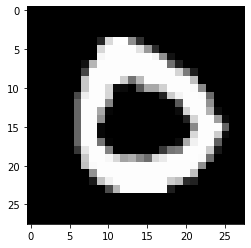

Label: 0.0 Predict: 0.0


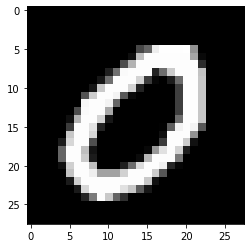

In [72]:
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    viewImageByIndex(my_dict01, badIndex, prediction01[badIndex])

In [82]:
%%time 
import pickle, gzip, urllib.request, json
import numpy as np

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
print(train_set[0].shape)

(50000, 784)
Wall time: 15 s


This is a 5


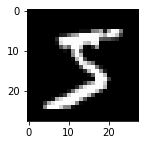

This is a 0


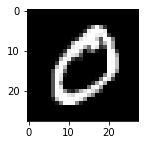

This is a 4


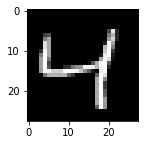

This is a 1


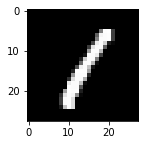

This is a 9


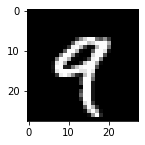

This is a 2


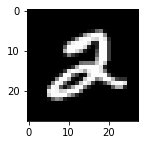

This is a 1


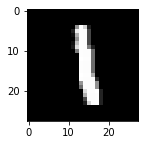

This is a 3


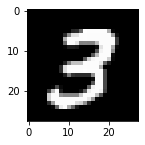

This is a 1


This is a 4


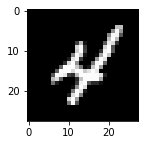

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (2,10)

for i in range(0, 10):
    img = train_set[0][i]
    label = train_set[1][i]
    img_reshape = img.reshape((28,28))
    imgplot = plt.imshow(img_reshape, cmap='gray')
    print('This is a {}'.format(label))
    plt.show()

In [89]:

imageId = 199 
viewImageByIndex(data, imageId)

TypeError: viewImageByIndex() missing 1 required positional argument: 'prediction'

In [3]:
#incercare
#!/usr/bin/env python

"""
Train a SVM to categorize 28x28 pixel images into digits (MNIST dataset).
"""

import numpy as np


def main():
    """Orchestrate the retrival of data, training and testing."""
    data = get_data()

    # Get classifier
    from sklearn.svm import SVC
    clf = SVC(probability=False,  # cache_size=200,
              kernel="rbf", C=5.0, gamma=.0073)

    print("Start fitting. This may take a while")

    # take all of it - make that number lower for experiments
    examples = len(data['train']['X'])
    clf.fit(data['train']['X'][:examples], data['train']['y'][:examples])

    analyze(clf, data)
    
    return (clf, data)


def analyze(clf, data):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    """
    # Get confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    print("Confusion matrix:\n%s" %
          metrics.confusion_matrix(data['test']['y'],
                                   predicted))
    print("Accuracy: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))

    # Print example
    try_id = 1
    out = clf.predict(data['test']['X'][try_id])  # clf.predict_proba
    print("out: %s" % out)
    size = int(len(data['test']['X'][try_id])**(0.5))
    view_image(data['test']['X'][try_id].reshape((size, size)),
               data['test']['y'][try_id])


def view_image(image, label=""):
    """
    View a single image.

    Parameters
    ----------
    image : numpy array
        Make sure this is of the shape you want.
    label : str
    """
    from matplotlib.pyplot import show, imshow, cm
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()    
    
#def get_data():
    """
    Get data ready to learn with.

    Returns
    -------
    dict
    """
  #  (x_train, y_train, x_test, y_test) = get_mnist_data()
   # data = {'train': {'X': x_train[0:,0,0:28,0:28].reshape((x_train.shape[0],-1)),
    #                  'y': y_train},
     #       'test': {'X': x_test[0:,0,0:28,0:28].reshape((x_test.shape[0],-1)),
      #               'y': y_test}}
    #return data

In [73]:
#if __name__ == '__main__':
#    (clf, data) = main()